In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from sympy import rotations


In [3]:
csv_directory = 'results'

# List to store individual DataFrames
dataframes = []

# Loop through all files in the directory
for file in os.listdir(csv_directory):
    if file.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(csv_directory, file)
        # Read the CSV file into a DataFrame
        temp_df = pd.read_csv(file_path)
        # Add the DataFrame to the list
        dataframes.append(temp_df)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)
df["toech_memory_allocated_GB"] = df["toech_memory_allocated"] / 1e9

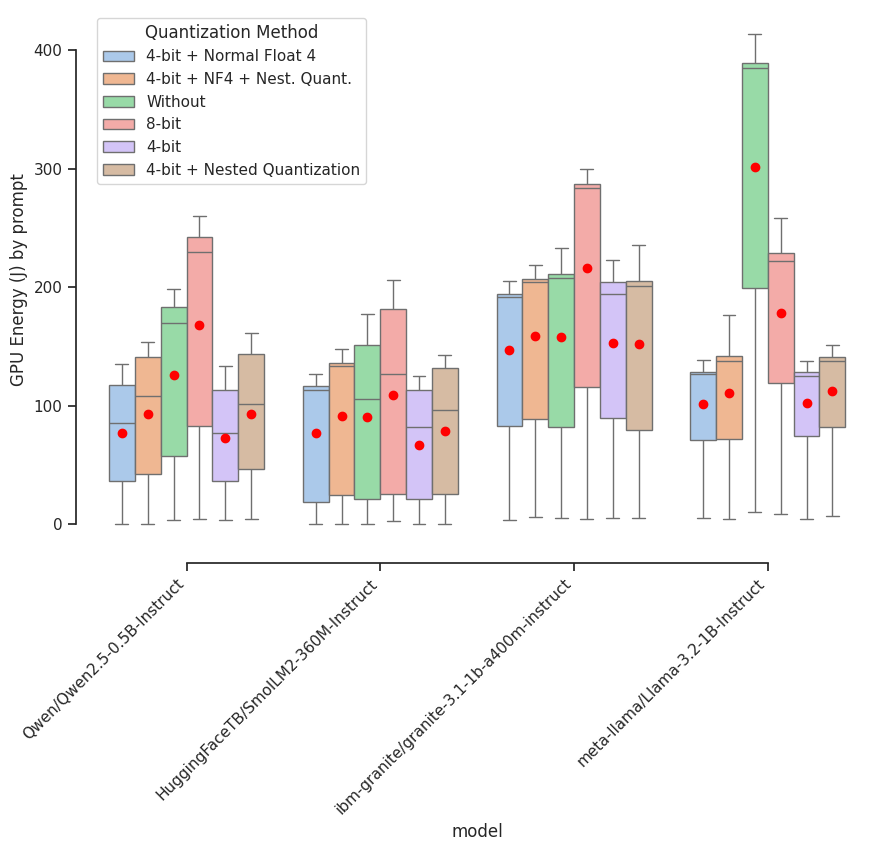

In [4]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="ticks", palette="pastel")

# Liste des modèles
model_id_list = ["Qwen/Qwen2.5-0.5B-Instruct", "ibm-granite/granite-3.1-1b-a400m-instruct",
                 "HuggingFaceTB/SmolLM2-360M-Instruct", "meta-llama/Llama-3.2-1B-Instruct"]

# Définir une palette de couleurs
palette = sns.color_palette("pastel", len(df["quantization"].unique()))

# Créer un dictionnaire pour mapper les niveaux de quantification aux couleurs
quantization_colors = {quantization: color for quantization, color in zip(df["quantization"].unique(), palette)}
# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="model", y="gpu_energy",
            hue="quantization", palette=palette,
            data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Set the y-axis label
ax.set_ylabel("GPU Energy (J) by prompt")

# Set the legend title
legend = ax.get_legend()
legend.set_title("Quantization Method")# Supposons que df est votre DataFrame
# df = pd.read_csv('votre_fichier.csv')  # Si vous chargez à partir d'un fichier CSV

# Grouper par 'model' et 'quantization' et appliquer describe()
grouped = df.groupby(['model', 'quantization'])['gpu_energy'].describe()

# Transposer le DataFrame
transposed = grouped.T

# Créer une heatmap avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(transposed, annot=True, cmap='RdYlGn', cbar=False, fmt=".2f")

# Sauvegarder l'image
plt.savefig('tableau_colore.png')

# Afficher l'image
plt.show()

/tmp/ipykernel_23605/3998453819.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transposed_with_units = transposed.applymap(lambda x: f"{x:.2f}J")


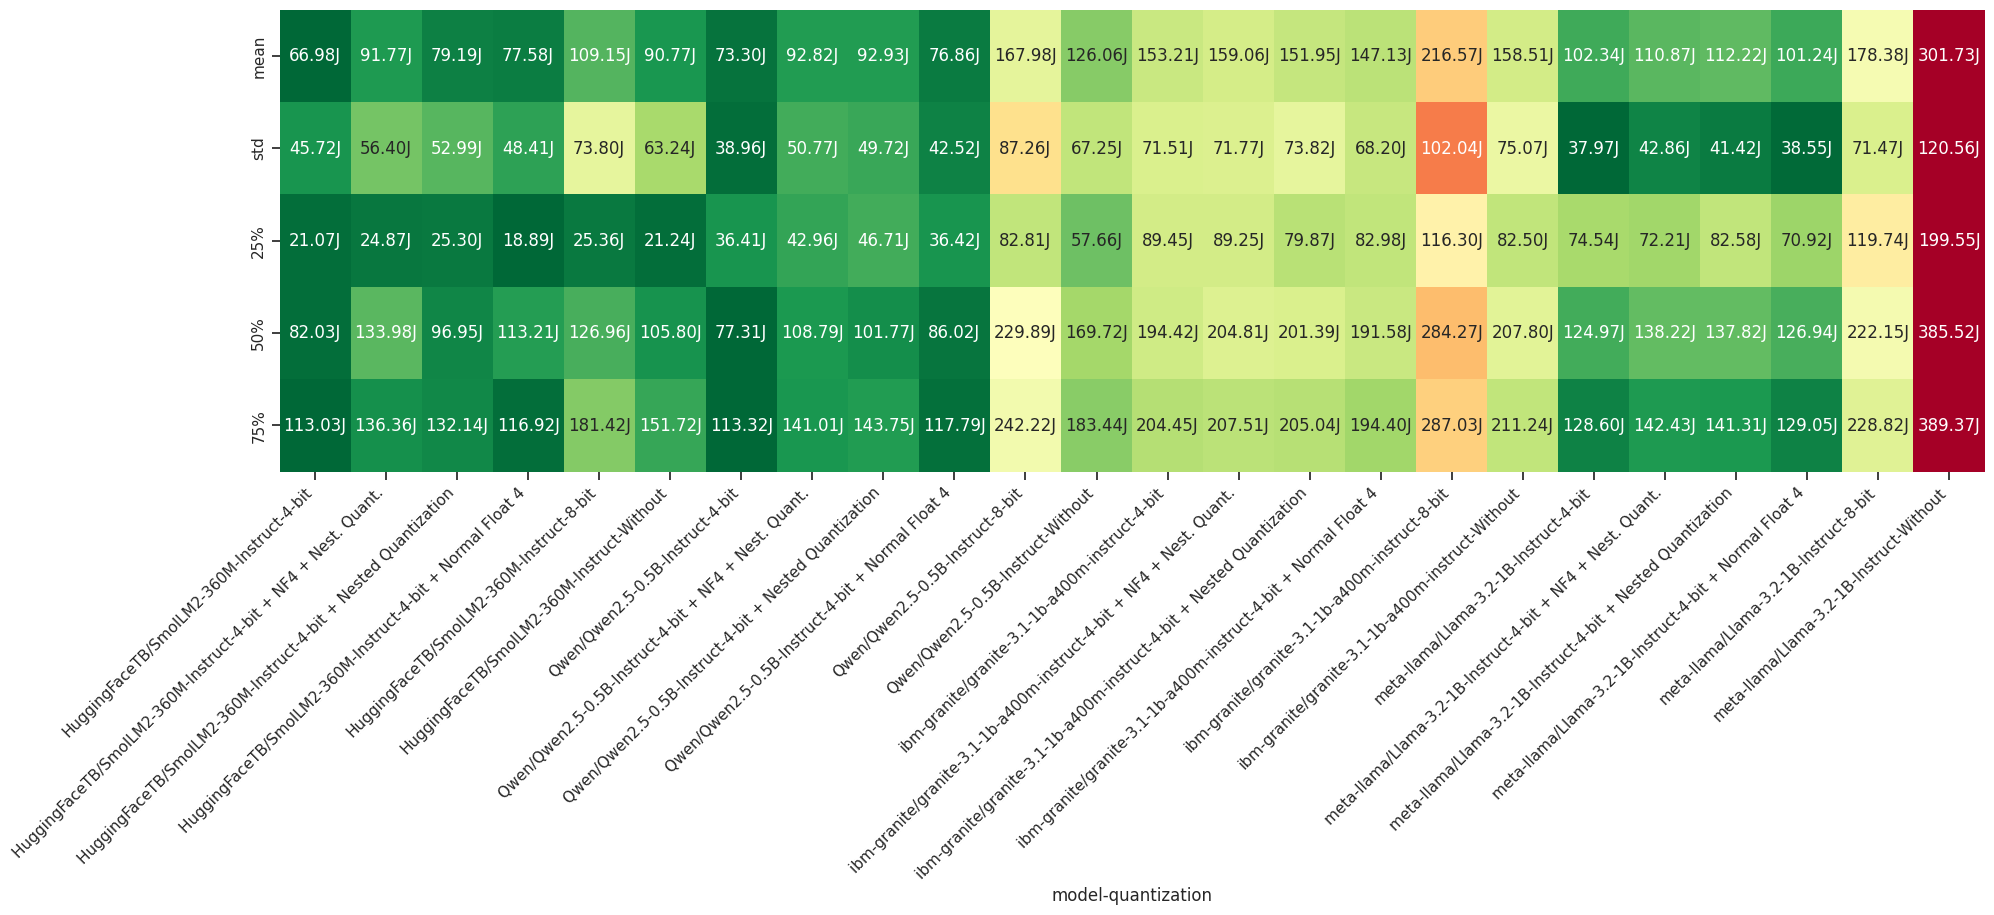

In [28]:
grouped = df.groupby(['model', 'quantization'])['gpu_energy'].describe()
grouped = grouped.drop(columns=['count',"max","min"])
transposed = grouped.T
transposed_with_units = transposed.applymap(lambda x: f"{x:.2f}J")

fig, ax = plt.subplots(figsize=(22, 6))
normalized = transposed.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

sns.heatmap(normalized, annot=transposed_with_units, cmap=cmap, cbar=False, fmt="", ax=ax, annot_kws={"size": 12})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.savefig('images/table_results_energy_prompts.png')
plt.show()


In [ ]:
df_stats_mwu = pd.DataFrame()

In [25]:
for model_id in model_id_list:
    print(model_id)
    #print(df[(df["quantization"]=="4-bit") & (df["model"]==model_id)]["gpu_energy"].tolist())
    mwu_4_bit, p = mannwhitneyu(np.asarray(df[(df["quantization"]=="4-bit") & (df["model"]==model_id)]["gpu_energy"].tolist()), np.asarray(df[(df["quantization"]=="Without") & (df["model"]==model_id)]["gpu_energy"].tolist()), nan_policy="omit")
    print(mwu_4_bit)
    print(p)

Qwen/Qwen2.5-0.5B-Instruct
276077.0
2.321870323168437e-67
ibm-granite/granite-3.1-1b-a400m-instruct
350374.5
4.7960335798556735e-31
HuggingFaceTB/SmolLM2-360M-Instruct
367459.0
1.0240003656058482e-24
meta-llama/Llama-3.2-1B-Instruct
118133.5
3.4427642243876493e-192


In [26]:
for model_id in model_id_list:
    print(model_id)
    #print(df[(df["quantization"]=="4-bit") & (df["model"]==model_id)]["gpu_energy"].tolist())
    mwu_8_bit, p = mannwhitneyu(np.asarray(df[(df["quantization"]=="8-bit") & (df["model"]==model_id)]["gpu_energy"].tolist()), np.asarray(df[(df["quantization"]=="Without") & (df["model"]==model_id)]["gpu_energy"].tolist()), nan_policy="omit")
    print(mwu_8_bit)
    print(p)

Qwen/Qwen2.5-0.5B-Instruct
684521.5
2.549290714302126e-46
ibm-granite/granite-3.1-1b-a400m-instruct
736321.0
8.164336385083906e-75
HuggingFaceTB/SmolLM2-360M-Instruct
627705.0
4.6244163756410424e-23
meta-llama/Llama-3.2-1B-Instruct
214916.0
5.26385041361219e-108


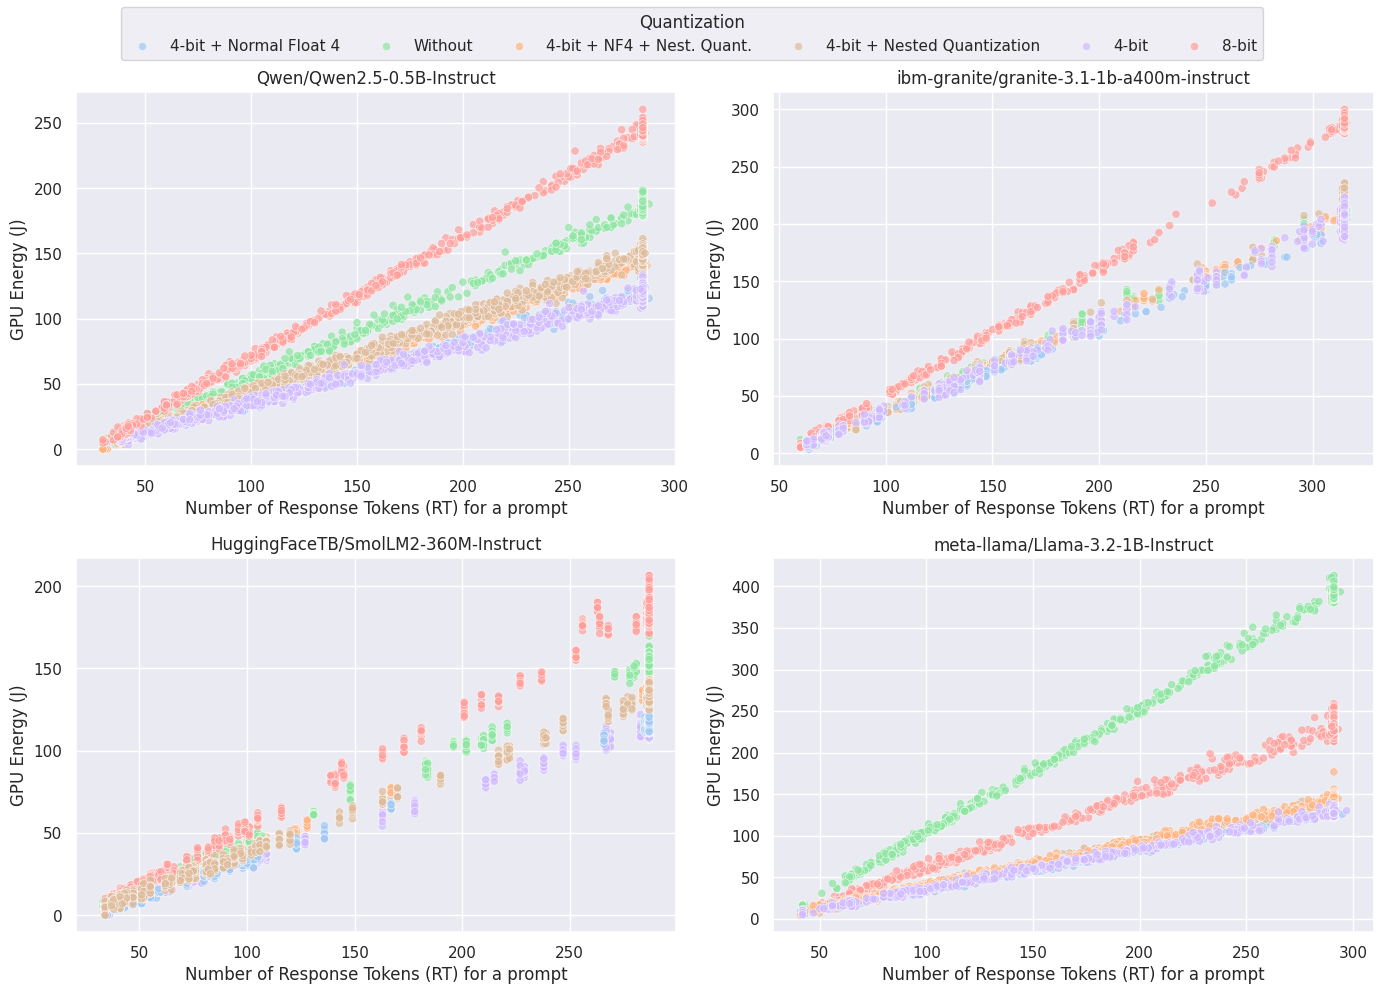

In [4]:

sns.set_theme()
# Liste des modèles
model_id_list = ["Qwen/Qwen2.5-0.5B-Instruct", "ibm-granite/granite-3.1-1b-a400m-instruct",
                 "HuggingFaceTB/SmolLM2-360M-Instruct", "meta-llama/Llama-3.2-1B-Instruct"]

# Définir une palette de couleurs
palette = sns.color_palette("pastel", len(df["quantization"].unique()))

# Créer un dictionnaire pour mapper les niveaux de quantification aux couleurs
quantization_colors = {quantization: color for quantization, color in zip(df["quantization"].unique(), palette)}

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Aplatir la grille

# Itérer sur chaque modèle
for i, model_id in enumerate(model_id_list):
    # Filtrer les données par modèle
    data = df[df["model"] == model_id]

    # Créer un nuage de points avec des marges (équivalent au jointplot)
    sns.scatterplot(
        x="response_tokens",
        y="gpu_energy",
        hue="quantization",
        palette=quantization_colors,
        data=data,
        ax=axes[i],
        alpha=0.7
    )

    # Ajouter des titres et labels
    axes[i].set_title(f'{model_id}')
    axes[i].set_xlabel('Number of Response Tokens (RT) for a prompt')
    axes[i].set_ylabel('GPU Energy (J)')

    # Supprimer la légende locale pour éviter les doublons
    axes[i].get_legend().remove()

# Créer une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Quantization', loc='upper center', ncol=len(labels))

# Ajuster la mise en page
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuster pour laisser de la place à la légende globale

plt.show()


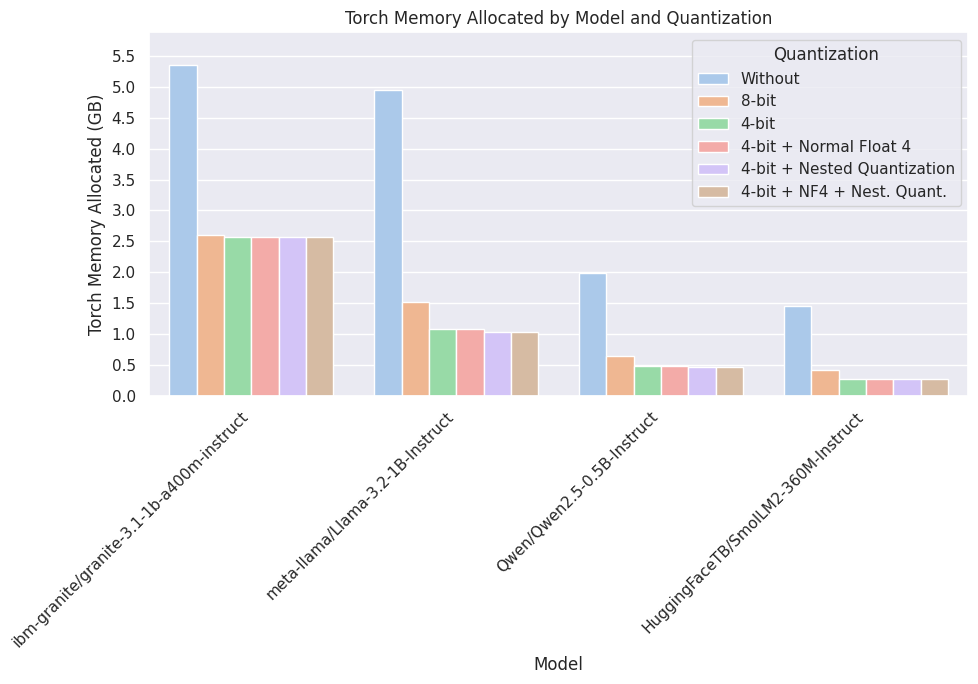

In [6]:
palette = sns.color_palette("pastel", len(df["quantization"].unique()))
sns.set_theme(style="darkgrid")

quantization_colors = {quantization: color for quantization, color in zip(df["quantization"].unique(), palette)}

# Étape 2 : Définir le thème
#sns.set_theme(style="ticks")
sns.set_theme(style="darkgrid")

# Étape 3 : Trier les données par ordre décroissant de consommation de mémoire
df_sorted = df.sort_values(by="toech_memory_allocated_GB", ascending=False)

# Étape 4 : Créer le bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x="model", y="toech_memory_allocated_GB", hue="quantization", data=df_sorted, palette=palette)

# Étape 5 : Resserrer l'échelle Y et ajouter des ticks tous les 0,5 Go
max_value = df_sorted["toech_memory_allocated_GB"].max()
plt.ylim(0, max_value * 1.1)  # Ajouter 10% d'espace au-dessus de la valeur maximale
plt.yticks(np.arange(0, max_value + 0.5, 0.5))  # Ajouter des ticks tous les 0,5 Go

# Étape 6 : Afficher le graphique
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Torch Memory Allocated (GB)')
plt.title('Torch Memory Allocated by Model and Quantization')
plt.legend(title='Quantization')
plt.tight_layout()

### Joule per token

<Figure size 640x480 with 0 Axes>

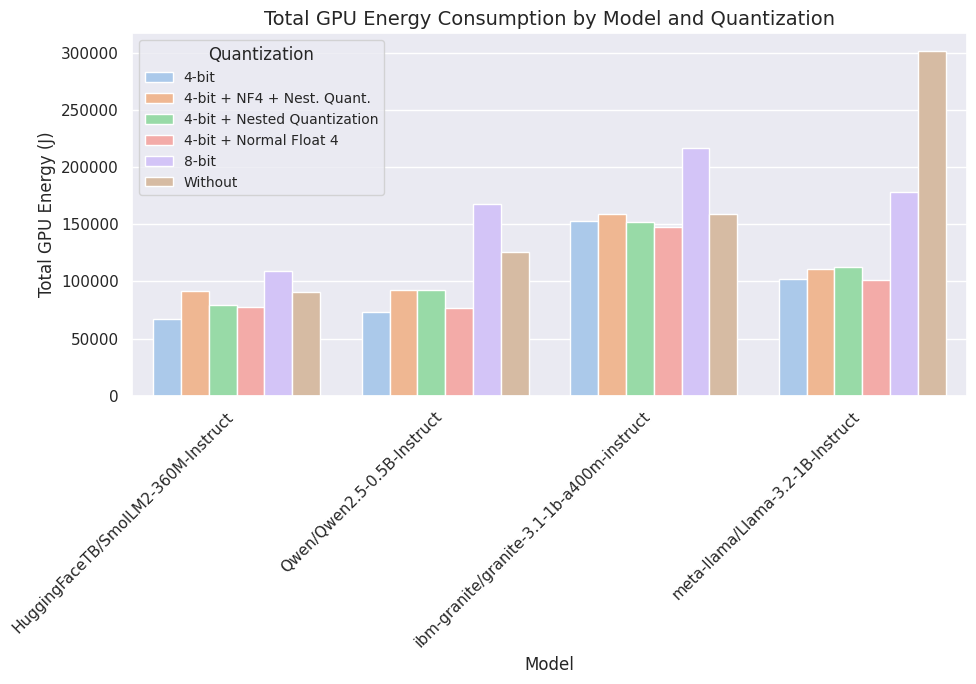

In [7]:
# Liste des modèles
model_id_list = ["Qwen/Qwen2.5-0.5B-Instruct", "ibm-granite/granite-3.1-1b-a400m-instruct",
                 "HuggingFaceTB/SmolLM2-360M-Instruct", "meta-llama/Llama-3.2-1B-Instruct"]

# Définir une palette de couleurs
palette = sns.color_palette("pastel", len(df["quantization"].unique()))
sns.set_theme(style="darkgrid")

# Créer un dictionnaire pour mapper les niveaux de quantification aux couleurs
quantization_colors = {quantization: color for quantization, color in zip(df["quantization"].unique(), palette)}

# Filtrer les données pour les modèles sélectionnés
df_filtered = df[df["model"].isin(model_id_list)]

# Calculer la somme de l'énergie pour chaque combinaison de modèle et quantization
sum_gpu_energy = df_filtered.groupby(['model', 'quantization'])['gpu_energy'].sum().reset_index()
sns.despine(offset=10, trim=True)


# Créer un barplot
plt.figure(figsize=(10, 7))
sns.barplot(
    x="model", 
    y="gpu_energy", 
    hue="quantization", 
    data=sum_gpu_energy, 
    palette=palette
)

# Ajouter des titres et labels
plt.title('Total GPU Energy Consumption by Model and Quantization', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Total GPU Energy (J)', fontsize=12)
plt.xticks(rotation=45, ha='right')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Ajouter la légende
plt.legend(title='Quantization', loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le plot
plt.show()

In [8]:
df["J_per_RT"] = df["gpu_energy"] / df["response_tokens"]

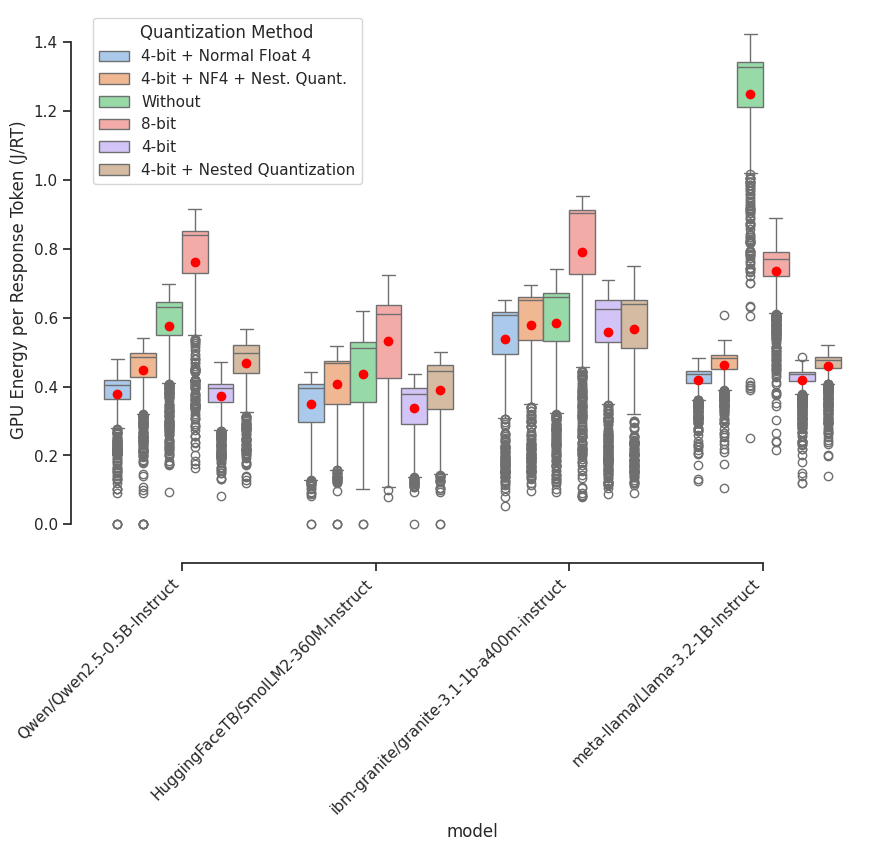

In [9]:
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10, 7))

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="model", y="J_per_RT",
            hue="quantization", palette="pastel",
            data=df, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"red"})

sns.despine(offset=10, trim=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Set the y-axis label
ax.set_ylabel("GPU Energy per Response Token (J/RT)")

# Set the legend title
legend = ax.get_legend()
legend.set_title("Quantization Method")

In [10]:
e_j = df["gpu_energy"].sum()
e_wh = df["gpu_energy"].sum()/3600
gCO2eq = e_wh / 1000 * 25
print("Energy consumed:", e_j, "J")
print("Energy consumed:", e_wh, "Wh")
print("gCO2eq:", gCO2eq)

Energy consumed: 3038612.709 J
Energy consumed: 844.0590858333333 Wh
gCO2eq: 21.101477145833332


In [11]:
energy_sum = df.groupby(['model', 'quantization'])['gpu_energy'].sum().reset_index()

energy_sum_pivot = energy_sum.pivot(index='model', columns='quantization', values='gpu_energy')

energy_sum_pivot['Gain Factor'] = energy_sum_pivot['Without'] / energy_sum_pivot['4-bit']

print(energy_sum_pivot[["Without","4-bit","Gain Factor"]].to_markdown(index=True))


| model                                     |   Without |    4-bit |   Gain Factor |
|:------------------------------------------|----------:|---------:|--------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   90770.5 |  66980.7 |       1.35517 |
| Qwen/Qwen2.5-0.5B-Instruct                |  126058   |  73305   |       1.71963 |
| ibm-granite/granite-3.1-1b-a400m-instruct |  158512   | 153212   |       1.03459 |
| meta-llama/Llama-3.2-1B-Instruct          |  301729   | 102335   |       2.94844 |


| Model                                     |   Without  |    4-bit | **Gain Factor (Energy)** |
|:------------------------------------------|-----------:|---------:|-------------------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   90770.5J | 66980.7J |              **1.35517** |
| Qwen/Qwen2.5-0.5B-Instruct                |  126058J   |   73305J |              **1.71963** |
| ibm-granite/granite-3.1-1b-a400m-instruct |  158512J   |  153212J |              **1.03459** |
| meta-llama/Llama-3.2-1B-Instruct          |  301729J   |  102335J |              **2.94844** |

In [20]:
energy_sum = df.groupby(['model', 'quantization'])['toech_memory_allocated_GB'].sum().reset_index()

energy_sum_pivot = energy_sum.pivot(index='model', columns='quantization', values='toech_memory_allocated_GB')

energy_sum_pivot['Gain Factor'] = energy_sum_pivot['Without'] / energy_sum_pivot['4-bit']

print(energy_sum_pivot[["Without","4-bit","Gain Factor"]].to_markdown(index=True))

| model                                     |   Without |    4-bit |   Gain Factor |
|:------------------------------------------|----------:|---------:|--------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   1460.75 |  280.742 |       5.20318 |
| Qwen/Qwen2.5-0.5B-Instruct                |   1985.38 |  482.896 |       4.11141 |
| ibm-granite/granite-3.1-1b-a400m-instruct |   5347.03 | 2568.38  |       2.08187 |
| meta-llama/Llama-3.2-1B-Instruct          |   4951.79 | 1082.66  |       4.57372 |


| Model                                     |   Without |    4-bit | **Gain Factor (Memory)** |
|:------------------------------------------|----------:|----------:|-------------------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       | 1460.75MB | 280.742MB |              **5.20318** |
| Qwen/Qwen2.5-0.5B-Instruct                | 1985.38MB | 482.896MB |              **4.11141** |
| ibm-granite/granite-3.1-1b-a400m-instruct | 5347.03MB | 2568.38MB |              **2.08187** |
| meta-llama/Llama-3.2-1B-Instruct          |  4951.7MB | 1082.66MB |              **4.57372** |

In [24]:
energy_sum = df.groupby(['model', 'quantization'])['toech_memory_allocated_GB'].sum().reset_index()

energy_sum_pivot = energy_sum.pivot(index='model', columns='quantization', values='toech_memory_allocated_GB')

energy_sum_pivot['Gain Factor'] = energy_sum_pivot['Without'] / energy_sum_pivot['8-bit']

print(energy_sum_pivot[["Without", "8-bit", "Gain Factor"]].to_markdown(index=True))

| model                                     |   Without |    8-bit |   Gain Factor |
|:------------------------------------------|----------:|---------:|--------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   1460.75 |  419.618 |       3.48115 |
| Qwen/Qwen2.5-0.5B-Instruct                |   1985.38 |  642.349 |       3.09082 |
| ibm-granite/granite-3.1-1b-a400m-instruct |   5347.03 | 2606.83  |       2.05117 |
| meta-llama/Llama-3.2-1B-Instruct          |   4951.79 | 1511.41  |       3.27628 |


| Model                                     |   Without |     8-bit | **Gain Factor (Memory)** |
|:------------------------------------------|----------:|----------:|-------------------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   1460.75MB | 419.618MB |              **3.48115** |
| Qwen/Qwen2.5-0.5B-Instruct                |   1985.38MB |   642.349MB |              **3.09082** |
| ibm-granite/granite-3.1-1b-a400m-instruct |   5347.03MB |   2606.83MB |              **2.05117** |
| meta-llama/Llama-3.2-1B-Instruct          |   4951.79MB |   1511.41MB |              **3.27628** |

In [23]:
energy_sum = df.groupby(['model', 'quantization'])['toech_memory_allocated_GB'].sum().reset_index()

energy_sum_pivot = energy_sum.pivot(index='model', columns='quantization', values='toech_memory_allocated_GB')

energy_sum_pivot['Gain Factor'] = energy_sum_pivot['8-bit'] / energy_sum_pivot['4-bit']

print(energy_sum_pivot[["8-bit","4-bit","Gain Factor"]].to_markdown(index=True))

| model                                     |    8-bit |    4-bit |   Gain Factor |
|:------------------------------------------|---------:|---------:|--------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |  419.618 |  280.742 |       1.49467 |
| Qwen/Qwen2.5-0.5B-Instruct                |  642.349 |  482.896 |       1.3302  |
| ibm-granite/granite-3.1-1b-a400m-instruct | 2606.83  | 2568.38  |       1.01497 |
| meta-llama/Llama-3.2-1B-Instruct          | 1511.41  | 1082.66  |       1.39601 |


| model                                     |     8-bit |    4-bit |      **Gain Factor** |
|:------------------------------------------|----------:|---------:|---------------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       | 419.618MB |  280.742MB |          **1.49467** |
| Qwen/Qwen2.5-0.5B-Instruct                |   642.349MB |  482.896MB |           **1.3302** |
| ibm-granite/granite-3.1-1b-a400m-instruct |   2606.83MB | 2568.38MB  |          **1.01497** |
| meta-llama/Llama-3.2-1B-Instruct          |   1511.41MB | 1082.66MB  |          **1.39601** |

In [21]:
energy_sum = df.groupby(['model', 'quantization'])['gpu_energy'].sum().reset_index()

energy_sum_pivot = energy_sum.pivot(index='model', columns='quantization', values='gpu_energy')

energy_sum_pivot['Gain Factor'] = energy_sum_pivot['Without'] / energy_sum_pivot['8-bit']

print(energy_sum_pivot[["Without","8-bit","Gain Factor"]].to_markdown(index=True))

| model                                     |   Without |   8-bit |   Gain Factor |
|:------------------------------------------|----------:|--------:|--------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       |   90770.5 |  109152 |      0.831596 |
| Qwen/Qwen2.5-0.5B-Instruct                |  126058   |  167975 |      0.750453 |
| ibm-granite/granite-3.1-1b-a400m-instruct |  158512   |  216566 |      0.731934 |
| meta-llama/Llama-3.2-1B-Instruct          |  301729   |  178381 |      1.69149  |


| Model                                     |  Without |   8-bit | **Gain Factor (energy)** |
|:------------------------------------------|---------:|--------:|-------------------------:|
| HuggingFaceTB/SmolLM2-360M-Instruct       | 90770.5J | 109152J |               **0.831596** |
| Qwen/Qwen2.5-0.5B-Instruct                |  126058J | 167975J |                 **0.750453** |
| ibm-granite/granite-3.1-1b-a400m-instruct |  158512J | 216566J |                 **0.731934** |
| meta-llama/Llama-3.2-1B-Instruct          |  301729J | 178381J |                  **1.69149** |